In [3]:
# pip install tensorflow

     |████████████████████████████████| 320.4 MB 16 kB/s s eta 0:00:01
     |████████████████████████████████| 10.6 MB 53.1 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 380 kB/s  eta 0:00:01
     |████████████████████████████████| 459 kB 58.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 59.1 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 65.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 112 kB/s  eta 0:00:01
     |████████████████████████████████| 114 kB 70.3 MB/s eta 0:00:01
     |████████████████████████████████| 779 kB 50.2 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 590 kB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 67.9 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 68.7 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=d0dcb83078d4ec5883417a3507983352b43ac65cd71da455b61f11ffd2db2400
  Stored in direc

In [2]:
# pip install matplotlib

     |████████████████████████████████| 11.6 MB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 92.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
pwd

'/root/Artist-Classification'

In [5]:
train_path = 'images/split/train'
valid_path = 'images/split/test'
test_path = 'images/split/val'

In [6]:
os.path.exists(train_path)

True

In [7]:
ls images/split/train

Claude_Monet/  Henri_Matisse/  andré_derain/  francisco_goya/  van_gogh/


In [8]:
classlist = ['Claude_Monet', 'Henri_Matisse', 'andré_derain', 'francisco_goya', 'van_gogh']
batch_size = 8

In [ ]:
AugmentGenerator = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [78]:
train_batches = AugmentGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=classlist, batch_size=batch_size)
valid_batches = ImageDataGenerator(rescale = 1./255.).flow_from_directory(valid_path, target_size=(224, 224), classes=classlist, batch_size=batch_size)
test_batches = ImageDataGenerator(rescale = 1./255.).flow_from_directory(test_path, target_size=(224, 224), classes=classlist, batch_size=batch_size)


Found 1169 images belonging to 5 classes.
Found 254 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [24]:
images, labels = next(train_batches)

In [25]:
classlist[list(labels[0]).index(1)]

'van_gogh'

In [26]:
images.shape

(8, 224, 224, 3)

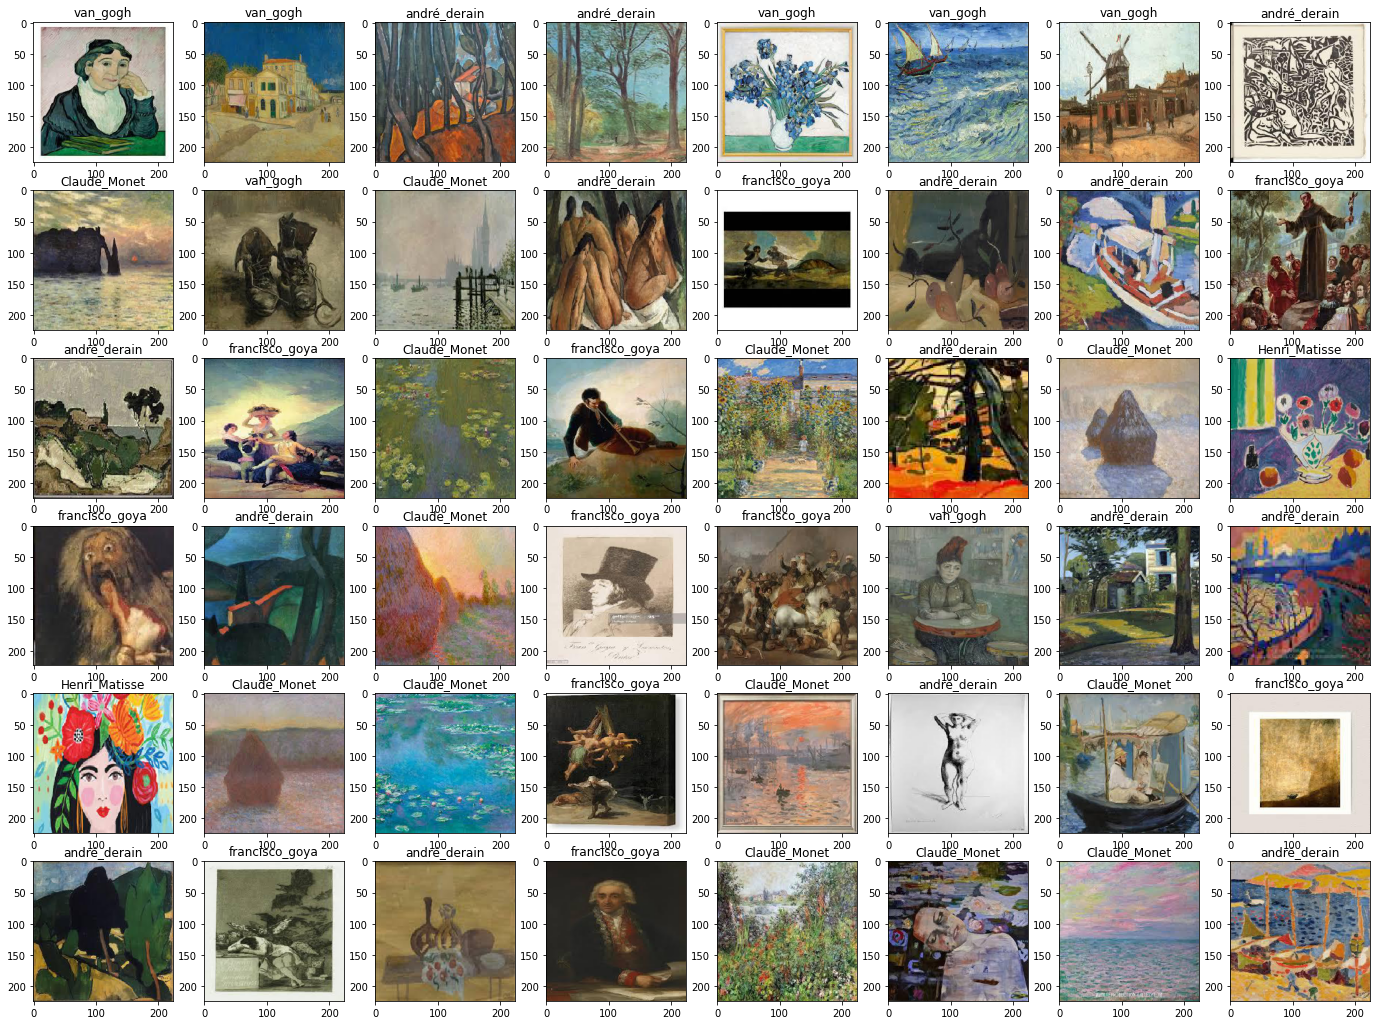

In [55]:
def image_plot(rows, batch, cols=batch_size):   
    
    fig, axs = plt.subplots(rows,cols,figsize=(cols*3,rows*3))

    for i in range(rows):
        
        images, labels = next(batch)
        
        for j, pic in enumerate(images):
            if rows > 1:
                axs[i,j].imshow(pic/255)
                axs[i,j].set_title(classlist[list(labels[j]).index(1)])
            
            else:
                axs[j].imshow(pic/255)
                axs[j].set_title(classlist[list(labels[j]).index(1)])

image_plot(rows=6, batch=train_batches)

In [14]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [28]:
Class_Model = Sequential()
for layer in vgg16_model.layers[:-1]:
    Class_Model.add(layer)

In [29]:
for layer in Class_Model.layers[:-1]:
    layer.trainable = False

In [30]:
num_classes = len(classlist)
Class_Model.add(Dense(num_classes, activation='softmax'))

In [31]:
Class_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [32]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [33]:
Class_Model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
Class_Model.fit(train_batches, validation_data=valid_batches, epochs=50, verbose=1)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 147 steps, validate for 32 steps
Epoch 1/50
147/147 [==============================] - 10s 65ms/step - loss: 0.0144 - accuracy: 0.9991 - val_loss: 0.9827 - val_accuracy: 0.7480
Epoch 2/50
147/147 [==============================] - 10s 65ms/step - loss: 0.0138 - accuracy: 0.9991 - val_loss: 0.9747 - val_accuracy: 0.7480
Epoch 3/50
147/147 [==============================] - 9s 65ms/step - loss: 0.0183 - accuracy: 0.9983 - val_loss: 0.9728 - val_accuracy: 0.7480
Epoch 4/50
147/147 [==============================] - 10s 65ms/step - loss: 0.0124 - accuracy: 0.9991 - val_loss: 1.0125 - val_accuracy: 0.7402
Epoch 5/50
147/147 [==============================] - 10s 65ms/step - loss: 0.0123 - accuracy: 0.9991 - val_loss: 0.9763 - val_accuracy: 0.7520
Epoch 6/50
147/147 [==============================] - 10s 65ms/step - loss: 0.0171 - accuracy: 0.9983 - val_loss: 0.9792 - val_accuracy: 0.7520
Epoch 7/50
147/147 [==============================] - 10s 65ms/step - loss: 0.0112 - accuracy:

In [41]:
Class_Model.save('Art5_Classifier_VGG16_model.h5')

In [38]:
pwd

'/root/Artist-Classification'

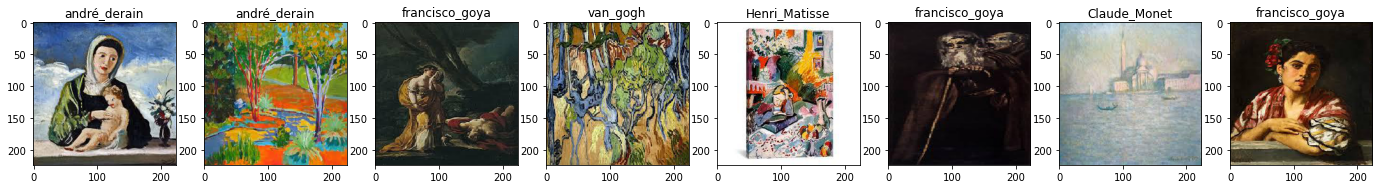

In [56]:
image_plot(rows=1, batch=test_batches)

In [59]:
predictions = Class_Model.predict(test_imgs)

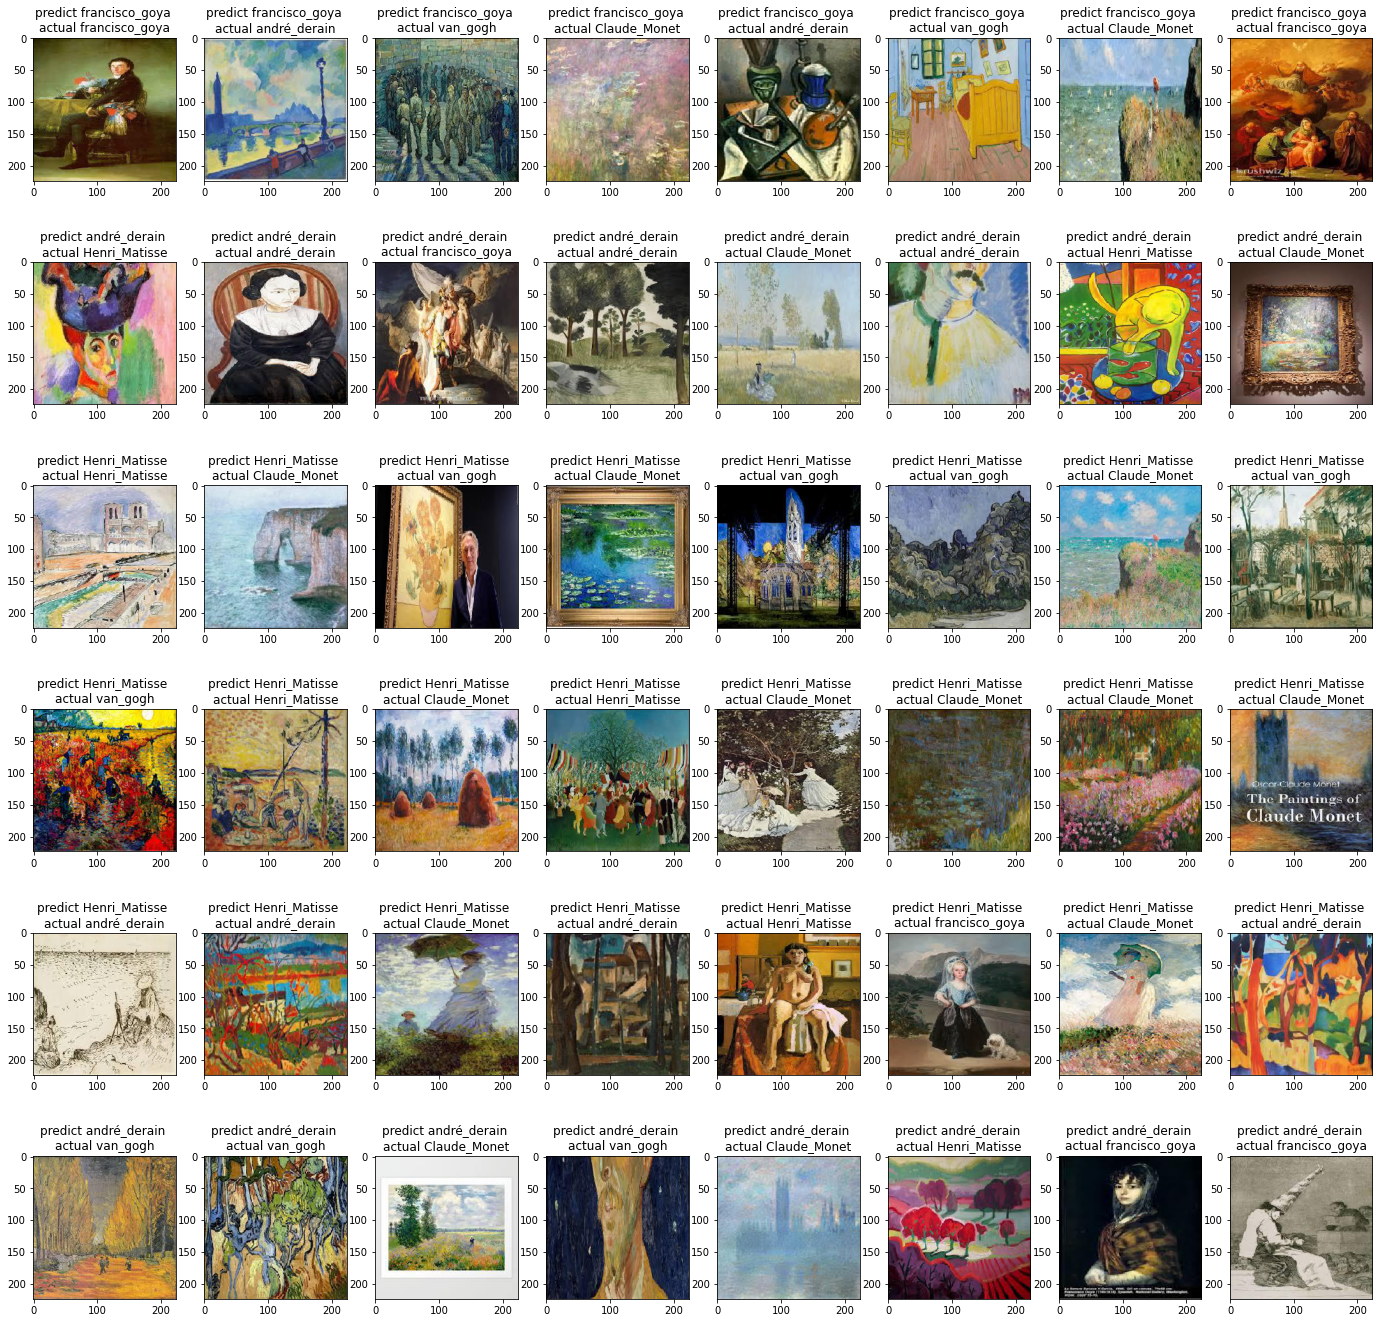

In [82]:
def image_plot_predict(rows, batch, model, cols=batch_size):   
    
    fig, axs = plt.subplots(rows,cols,figsize=(cols*3,rows*4))

    for i in range(rows):
        
        images, labels = next(batch)
        predictions = Class_Model.predict(images)
        
        for j, pic in enumerate(images):
            
            title = 'predict' + ' ' + \
            classlist[list(predictions[i]).index(predictions[i].max())] + ' ' + \
            '\n' + \
            'actual' + ' ' + \
            classlist[list(labels[j]).index(1)]
            
            if rows > 1:
                axs[i,j].imshow(pic)
                axs[i,j].set_title(title)
            
            else:
                axs[j].imshow(pic)
                axs[j].set_title(title)

image_plot_predict(rows=6, batch=test_batches, model=Class_Model)